<a href="https://colab.research.google.com/github/davanstrien/people-iiif/blob/main/02_wikidata_train_baseline_less_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 6.1MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 12.8MB 66.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
from pathlib import Path
from numpy.random import RandomState
from toolz import itertoolz, dicttoolz
from fastai.vision.all import *
from sklearn.model_selection import GroupShuffleSplit, StratifiedShuffleSplit

In [6]:
path = Path('/content/drive/MyDrive/IIIF_AI_project')

In [7]:
df = pd.read_csv(path/'wikidata_w_image-labels.csv')

In [8]:
df

,tgm,item,themeLabel,url,urlhash,label,dl_fpath
0,tgm002065,http://www.wikidata.org/entity/Q29384004,cigarette,http://commons.wikimedia.org/wiki/Special:FilePath/11-00%20A.M.%20Monday%2C%20May%209th%2C%201910.%20Newsies%20at%20Skeeter%27s%20Branch%2C%20Jefferson%20near%20Franklin.%20They%20were%20all%20smoking.%20Location-%20St.%20Louis%2C%20Missouri.%20MET%20DP352686.jpg,5476561517036506605,cigarette,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/5476561517036506605.jpg
1,tgm002065,http://www.wikidata.org/entity/Q29578945,cigarette,http://commons.wikimedia.org/wiki/Special:FilePath/Anonymous%20Olga%20Bozna%C5%84ska%20sitting%20on%20a%20sofa%20with%20a%20cigarette.jpg,2547666618636415996,cigarette,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/2547666618636415996.jpg
2,tgm002065,http://www.wikidata.org/entity/Q56713789,cigarette,http://commons.wikimedia.org/wiki/Special:FilePath/100D%20-%202%2C%20Acervo%20do%20Museu%20Paulista%20da%20USP.jpg,3108069741139737998,cigarette;portrait,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/3108069741139737998.jpg
3,tgm002065,http://www.wikidata.org/entity/Q56718359,cigarette,http://commons.wikimedia.org/wiki/Special:FilePath/4455D%20-%2001%2C%20Acervo%20do%20Museu%20Paulista%20da%20USP.jpg,6536074540519139147,cigarette;portrait,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/6536074540519139147.jpg
4,tgm002065,http://www.wikidata.org/entity/Q78123994,cigarette,http://commons.wikimedia.org/wiki/Special:FilePath/Avisgutter%20tar%20seg%20en%20r%C3%B8yk%20%281905%29.jpg,17560400556605834985,cigarette,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/17560400556605834985.jpg
...,...,...,...,...,...,...,...
12145,tgm000686,http://www.wikidata.org/entity/Q75691041,award,http://commons.wikimedia.org/wiki/Special:FilePath/-A%20man%20with%20a%20trophy%2C%20Builth%20Wells%20Golf%20Club%20%281293417%29.jpg,18274333717120672795,award,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/18274333717120672795.jpg
12146,tgm002207,http://www.wikidata.org/entity/Q78145666,coachman,http://commons.wikimedia.org/wiki/Special:FilePath/Slededrosjer%20ved%20Nationaltheatret.%20-%2013.02.1904%20-%20Anders%20Beer%20Wilse%20-%20Oslo%20Museum%20-%20OB.Y1410.jpg,4983334255754292679,coachman,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/4983334255754292679.jpg
12147,tgm003584,http://www.wikidata.org/entity/Q96181582,work,http://commons.wikimedia.org/wiki/Special:FilePath/Pea%20Pickers%20Line%20Up%20on%20Edge%20of%20Field%20at%20Weigh%20Scale%2C%20near%20Calipatria%2C%20Imperial%20Valley%2C%20California%2C%20February%20MET%20DP-14185-001.jpg,2158356187537040849,work,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/2158356187537040849.jpg
12148,tgm003584,http://www.wikidata.org/entity/Q96803013,work,http://commons.wikimedia.org/wiki/Special:FilePath/-Women%20Grinding%20Paint%2C%20Calcutta-%20MET%20DP332540.jpg,2470024329174724360,work,/content/drive/MyDrive/IIIF_AI_project/wikidata-images-labels/2470024329174724360.jpg


In [9]:
labels = list(itertoolz.concat(df.label.str.split(";").to_list()))

In [10]:
label_freqs = itertoolz.frequencies(labels)

In [12]:
label_freqs_ge_20 = dicttoolz.valfilter(lambda x: x>=20, label_freqs)

In [13]:
labels_ge_20 = list(label_freqs_ge_20.keys())

In [15]:
def check_in_freq(x):
    new_labels = []
    labels = x.split(";")
    for label in labels:
        if label in labels_ge_20:
            new_labels.append(label)
    return new_labels


In [16]:
df['filteredlabels'] = df.label.apply(check_in_freq)

In [17]:
df['filteredlabels'] = df['filteredlabels'].apply(";".join)

In [18]:
df['fname'] = df.dl_fpath.apply(lambda x: Path(x).name)

In [19]:
dls = ImageDataLoaders.from_df(df, 
                               path=path/'wikidata-images',
                               fn_col='fname',
                               label_col='filteredlabels',
                               label_delim=";",
                               valid_pct=0.3,
                               bs=128, 
                               item_tfms=Resize(254), 
                               batch_tfms=[Rotate(), Warp(0.1), Normalize.from_stats(*imagenet_stats)])

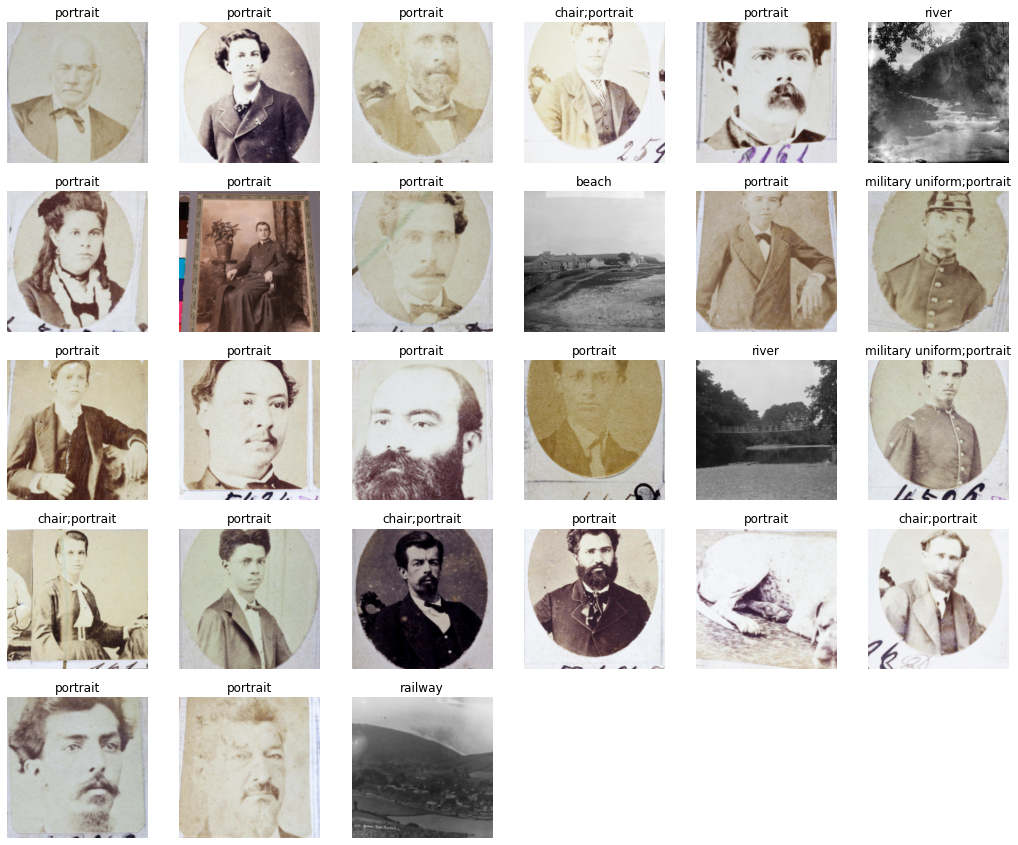

In [20]:
dls.show_batch(max_n=27)

In [21]:
dls.vocab

['award', 'beach', 'bridge', 'chair', 'column', 'dam', 'fortification', 'hug', 'military uniform', 'poet', 'portrait', 'railway', 'river', 'school', 'sport', 'stained glass', 'tree']

In [22]:
learn = cnn_learner(dls, resnet34, metrics=[F1ScoreMulti(average='macro'), accuracy_multi]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,1.000496,0.760597,0.087285,0.544953,41:57
1,0.944238,0.716510,0.096714,0.568660,02:34
2,0.884745,0.668965,0.103833,0.603437,02:35
3,0.808756,0.597997,0.116711,0.683047,02:32
4,0.697993,0.464848,0.159449,0.850496,02:35
5,0.521020,0.262720,0.302729,0.977358,02:33
6,0.311654,0.105733,0.212613,0.987235,02:33
7,0.166746,0.060755,0.218771,0.987541,02:33
8,0.098186,0.046789,0.217947,0.987896,02:33
9,0.071171,0.039762,0.399251,0.987283,02:32


Better model found at epoch 0 with f1_score value: 0.08728502364904395.


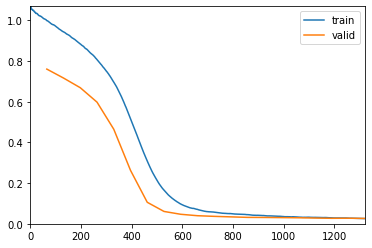

Better model found at epoch 1 with f1_score value: 0.09671397545789646.
Better model found at epoch 2 with f1_score value: 0.10383318469312434.
Better model found at epoch 3 with f1_score value: 0.11671138579604512.
Better model found at epoch 4 with f1_score value: 0.1594491424254002.
Better model found at epoch 5 with f1_score value: 0.30272908546954236.
Better model found at epoch 9 with f1_score value: 0.3992514543302234.
Better model found at epoch 11 with f1_score value: 0.4294547278998932.
Better model found at epoch 12 with f1_score value: 0.4571399268841103.
Better model found at epoch 13 with f1_score value: 0.4622762817191627.
Better model found at epoch 14 with f1_score value: 0.4796625471474549.
Better model found at epoch 15 with f1_score value: 0.5207166322090844.
Better model found at epoch 17 with f1_score value: 0.5929014139719169.


epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.025879,0.024611,0.628152,0.991237,02:34
1,0.022180,0.024079,0.635023,0.991608,02:34
2,0.019571,0.023149,0.642474,0.991818,02:37
3,0.016946,0.023141,0.676031,0.991947,02:35
4,0.015528,0.023462,0.680985,0.992157,02:36
5,0.013563,0.023837,0.671853,0.992221,02:35
6,0.011838,0.023642,0.704301,0.992318,02:36
7,0.010371,0.024746,0.695737,0.992157,02:35
8,0.008966,0.025364,0.700613,0.991850,02:39
9,0.008242,0.026555,0.695021,0.992012,02:35


Better model found at epoch 0 with f1_score value: 0.6281516926076149.


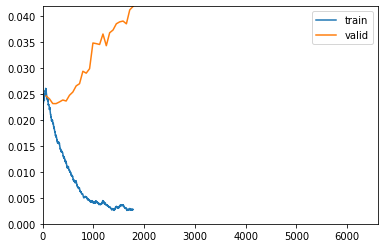

Better model found at epoch 1 with f1_score value: 0.6350226661677231.
Better model found at epoch 2 with f1_score value: 0.6424735649167193.
Better model found at epoch 3 with f1_score value: 0.6760312841381574.
Better model found at epoch 4 with f1_score value: 0.6809848322709893.
Better model found at epoch 6 with f1_score value: 0.7043013787390361.
Epoch 10: reducing lr to 4.367257505834164e-05
Better model found at epoch 12 with f1_score value: 0.7156338682033079.
Better model found at epoch 13 with f1_score value: 0.7203533903499648.
Epoch 17: reducing lr to 7.230030215257753e-05
Better model found at epoch 19 with f1_score value: 0.7244588152706326.
Epoch 23: reducing lr to 9.232333234984554e-05
No improvement since epoch 19: early stopping


In [23]:
learn.fine_tune(100, freeze_epochs=20,
                cbs=[SaveModelCallback(monitor='f1_score'),
                     EarlyStoppingCallback(monitor='f1_score', patience=8),
                     ReduceLROnPlateau(patience=4, monitor='f1_score'),
                     ShowGraphCallback()])

In [24]:
from sklearn.metrics import classification_report

In [25]:
y_pred, y_true = learn.get_preds()

In [26]:
print(classification_report(y_true, y_pred>0.50, target_names=dls.vocab, zero_division=1))

                  precision    recall  f1-score   support

           award       0.96      0.87      0.92        31
           beach       0.91      0.59      0.71        17
          bridge       0.66      0.45      0.53        47
           chair       0.86      0.55      0.67       221
          column       1.00      0.60      0.75         5
             dam       0.79      0.83      0.81        18
   fortification       0.54      0.88      0.67         8
             hug       0.69      0.39      0.50       114
military uniform       0.77      0.58      0.66        52
            poet       0.79      0.90      0.84        30
        portrait       1.00      1.00      1.00      3226
         railway       0.64      0.64      0.64        25
           river       0.71      0.44      0.55        88
          school       0.89      0.47      0.62        17
           sport       0.91      0.81      0.86        52
   stained glass       0.89      0.89      0.89         9
            t